# 觀察與分析
## 天氣與確診數之間的關係
* 資料來源: https://www.kaggle.com/kimjihoo/coronavirusdataset/data
* 日期: 2020-01-20 到 2020-05-13
*  16 個地方
    1. Seoul
    2. Busan
    3. Daegu 
    4. Gwangju
    5. Incheon
    6. Daejeon
    7. Ulsan 	
    8. Gyeonggi-do 
    9. Gangwon-do
    11. Chungcheongnam-do 
    12. Jeollabuk-do
    13. Jeollanam-do
    14. Gyeongsangbuk-do
    15. Gyeongsangnam-do
    16. Jeju-do 	
* 溼度與卻診數的關係
* 溫度與卻診數的關係

In [1]:
# 匯入套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

/home/arielwu/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# 讀取 Weather
df = pd.read_csv('Weather.csv')
df['date'] = pd.to_datetime(df['date'])
df  = df[df.date.dt.year == 2020]

# 只抽取 2020 年的
df.head(5)

code province       date  avg_temp  min_temp  max_temp  precipitation  \
23375  10000    Seoul 2020-01-01      -2.2      -6.5       0.3            0.1   
23376  11000    Busan 2020-01-01       1.9      -3.2       7.8            0.0   
23377  12000    Daegu 2020-01-01       0.2      -4.9       4.6            0.0   
23378  13000  Gwangju 2020-01-01      -0.3      -4.9       5.7            0.0   
23379  14000  Incheon 2020-01-01      -1.4      -5.4       1.9            0.0   

       max_wind_speed  most_wind_direction  avg_relative_humidity  
23375             2.6                 50.0                   64.4  
23376             5.1                340.0                   44.0  
23377             5.6                270.0                   53.3  
23378             4.3                 50.0                   58.0  
23379             3.8                160.0                   66.6

In [3]:
# 讀取 province
province = pd.read_csv('TimeProvince.csv')
province['date'] = pd.to_datetime(province['date'])
province.head(5)

date  time province  confirmed  released  deceased
0 2020-01-20    16    Seoul          0         0         0
1 2020-01-20    16    Busan          0         0         0
2 2020-01-20    16    Daegu          0         0         0
3 2020-01-20    16  Incheon          1         0         0
4 2020-01-20    16  Gwangju          0         0         0

In [4]:
province.tail(5)
# 可得知要取出的日期介於 2020-01-20 到 2020-05-13

date  time          province  confirmed  released  deceased
1967 2020-05-14     0      Jeollabuk-do         20        14         0
1968 2020-05-14     0      Jeollanam-do         17        13         0
1969 2020-05-14     0  Gyeongsangbuk-do       1368      1237        54
1970 2020-05-14     0  Gyeongsangnam-do        119       114         0
1971 2020-05-14     0           Jeju-do         14        12         0

In [5]:
# 取出的日期介於 2020-01-20 到 2020-05-13
df = df[df['date'] >= '2020-01-20']
df = df[df['date'] <= '2020-05-13']

In [6]:
df.head(5)

code province       date  avg_temp  min_temp  max_temp  precipitation  \
23679  10000    Seoul 2020-01-20       0.7      -3.3       5.5            0.0   
23680  11000    Busan 2020-01-20       5.1       1.6       9.8            0.0   
23681  12000    Daegu 2020-01-20       4.6       2.4       8.1            0.0   
23682  13000  Gwangju 2020-01-20       4.0       1.2       7.9            0.0   
23683  14000  Incheon 2020-01-20       1.2      -2.1       5.1            0.0   

       max_wind_speed  most_wind_direction  avg_relative_humidity  
23679             5.7                270.0                   46.8  
23680             6.1                270.0                   45.6  
23681             6.4                290.0                   44.1  
23682             3.3                270.0                   63.1  
23683             8.6                320.0                   56.0

In [7]:
df.tail()

code          province       date  avg_temp  min_temp  max_temp  \
25514  50000      Jeollabuk-do 2020-05-13      16.1       9.2      22.1   
25515  51000      Jeollanam-do 2020-05-13      18.0      12.7      23.4   
25516  60000  Gyeongsangbuk-do 2020-05-13      18.8      12.3      24.3   
25517  61000  Gyeongsangnam-do 2020-05-13      17.4      10.7      24.0   
25518  70000           Jeju-do 2020-05-13      17.0      13.2      20.4   

       precipitation  max_wind_speed  most_wind_direction  \
25514            0.0             4.7                110.0   
25515            0.0             9.0                230.0   
25516            0.0             8.0                290.0   
25517            0.0             4.3                160.0   
25518            0.0             4.1                320.0   

       avg_relative_humidity  
25514                   50.9  
25515                   46.5  
25516                   37.4  
25517                   46.3  
25518                   47.4

In [8]:
province = province[province['date'] >= '2020-01-20']
province = province[province['date'] <= '2020-05-13']

In [9]:
province.head(5)

date  time province  confirmed  released  deceased
0 2020-01-20    16    Seoul          0         0         0
1 2020-01-20    16    Busan          0         0         0
2 2020-01-20    16    Daegu          0         0         0
3 2020-01-20    16  Incheon          1         0         0
4 2020-01-20    16  Gwangju          0         0         0

In [10]:
province.tail(5)

date  time          province  confirmed  released  deceased
1950 2020-05-13     0      Jeollabuk-do         20        14         0
1951 2020-05-13     0      Jeollanam-do         16        12         0
1952 2020-05-13     0  Gyeongsangbuk-do       1367      1231        54
1953 2020-05-13     0  Gyeongsangnam-do        119       113         0
1954 2020-05-13     0           Jeju-do         14        12         0

In [11]:
# 各個地方的 dataframe
weather = []
sick = []
location = ['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon', 'Ulsan', 'Gyeonggi-do', 'Gangwon-do', 'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']
for i in range(0,len(location)):
    weather.append(df[df.province == location[i]])
    sick.append(province[province.province == location[i]])
print('---------\nWeather.csv\n----------')
for i in range(0,len(weather)):
    print('Province:{} 有{}筆資料'.format(weather[i].iloc[0,1], weather[i].shape[0]))
print('---------\nTimeProvince.csv\n----------')
for i in range(0,len(weather)):
    print('Province:{} 有{}筆資料'.format(sick[i].iloc[0,2], sick[i].shape[0]))

---------
Weather.csv
----------
Province:Seoul 有115筆資料
Province:Busan 有115筆資料
Province:Daegu 有115筆資料
Province:Gwangju 有115筆資料
Province:Incheon 有115筆資料
Province:Daejeon 有115筆資料
Province:Ulsan 有115筆資料
Province:Gyeonggi-do 有115筆資料
Province:Gangwon-do 有115筆資料
Province:Chungcheongnam-do 有115筆資料
Province:Jeollabuk-do 有115筆資料
Province:Jeollanam-do 有115筆資料
Province:Gyeongsangbuk-do 有115筆資料
Province:Gyeongsangnam-do 有115筆資料
Province:Jeju-do 有115筆資料
---------
TimeProvince.csv
----------
Province:Seoul 有115筆資料
Province:Busan 有115筆資料
Province:Daegu 有115筆資料
Province:Gwangju 有115筆資料
Province:Incheon 有115筆資料
Province:Daejeon 有115筆資料
Province:Ulsan 有115筆資料
Province:Gyeonggi-do 有115筆資料
Province:Gangwon-do 有115筆資料
Province:Chungcheongnam-do 有115筆資料
Province:Jeollabuk-do 有115筆資料
Province:Jeollanam-do 有115筆資料
Province:Gyeongsangbuk-do 有115筆資料
Province:Gyeongsangnam-do 有115筆資料
Province:Jeju-do 有115筆資料


# 溫度與確診數的關係
* 15 個地區 & 全國
* 累計確診數 & 當日確診數

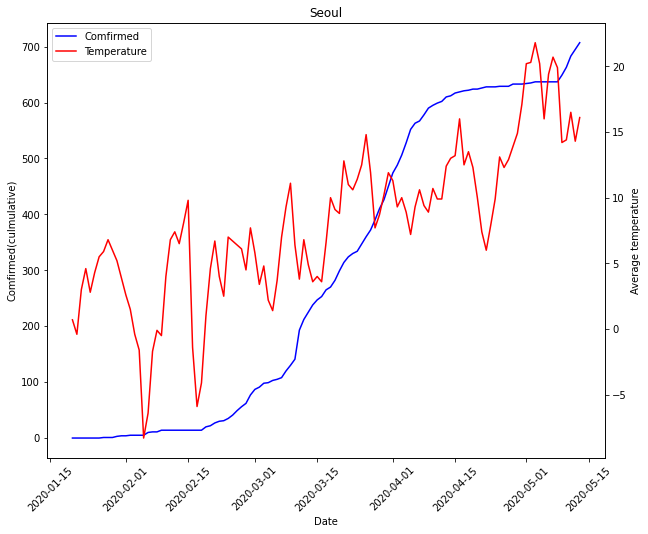

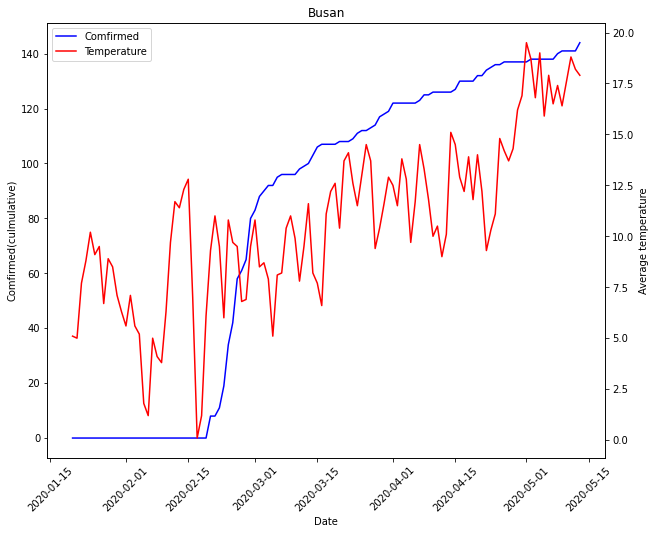

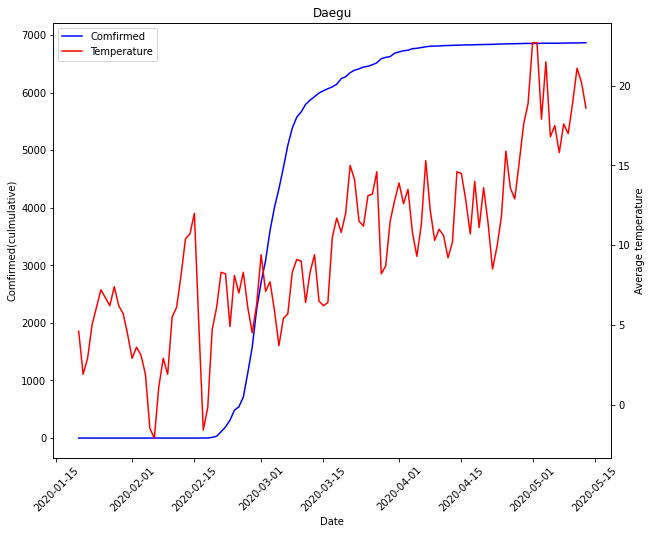

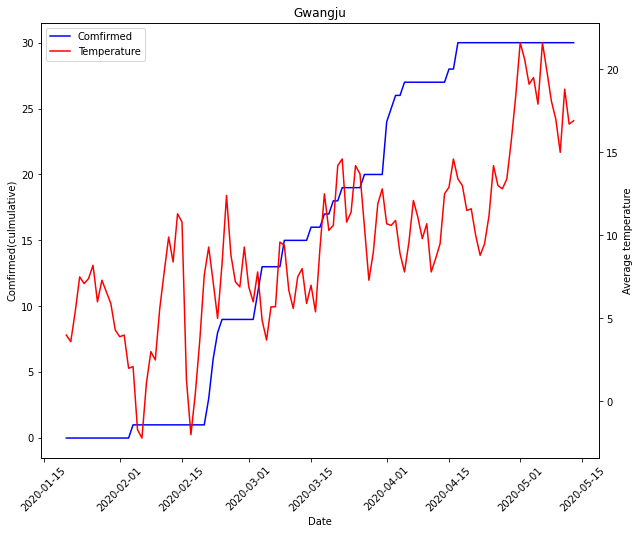

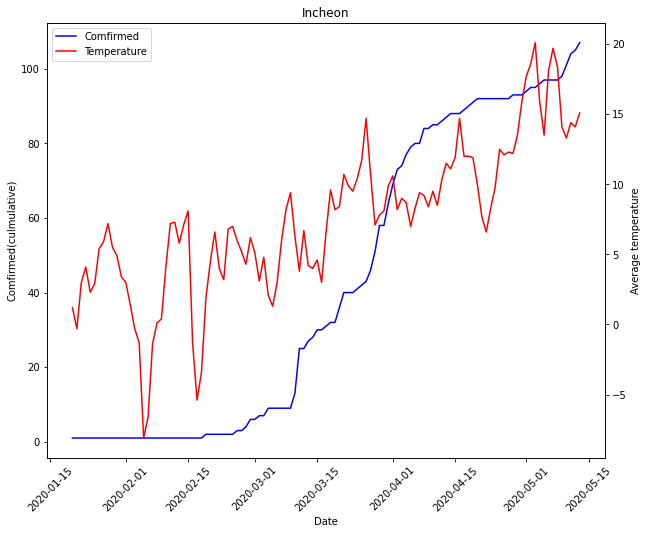

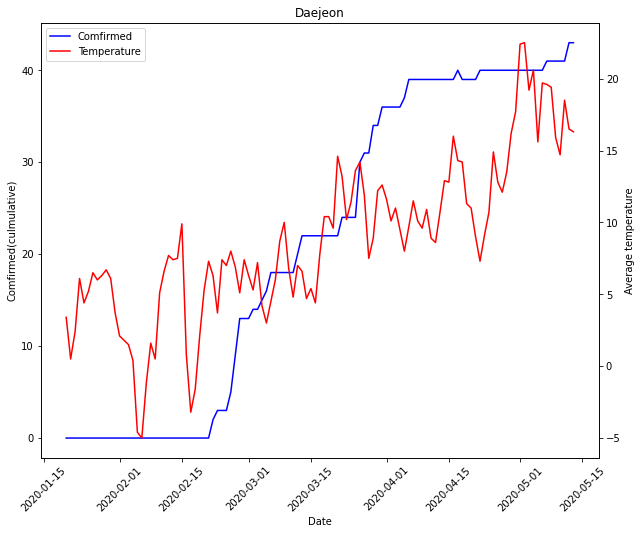

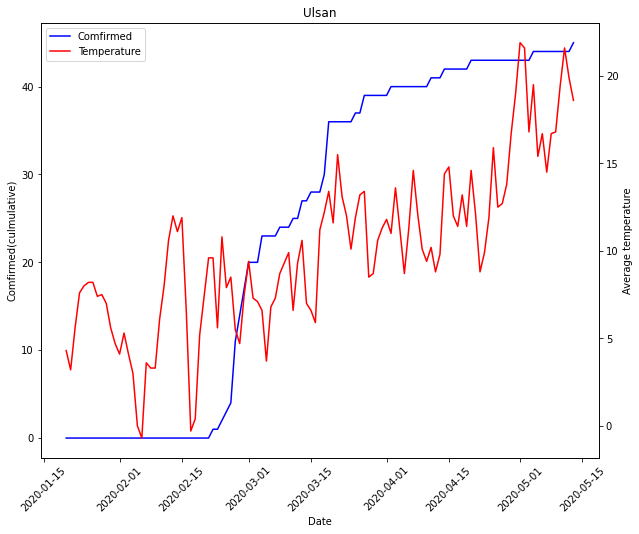

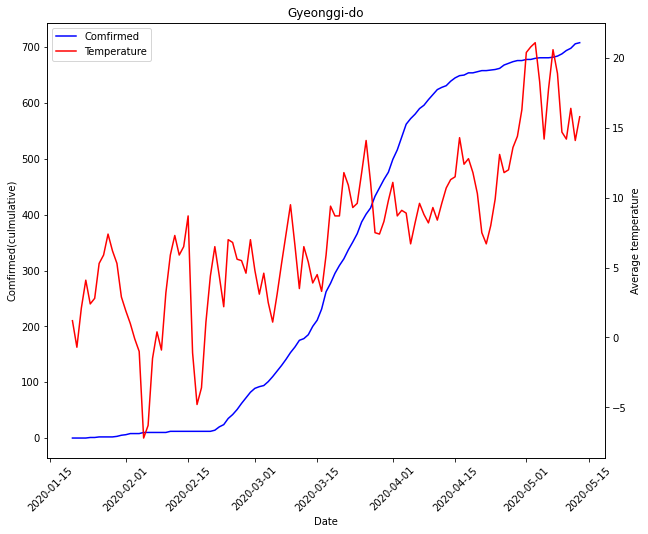

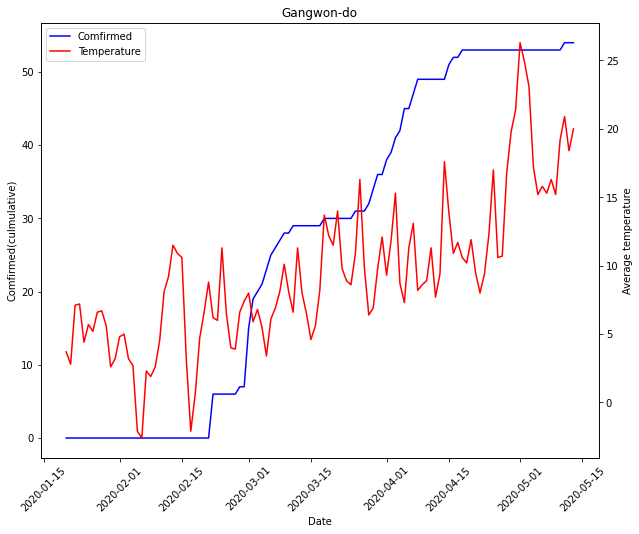

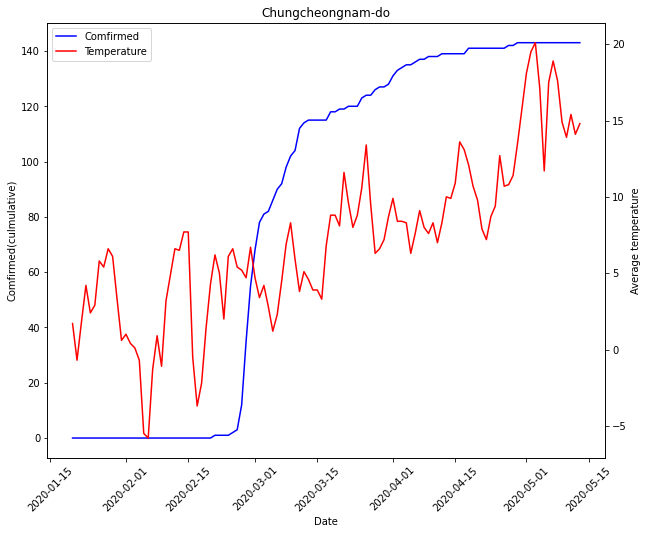

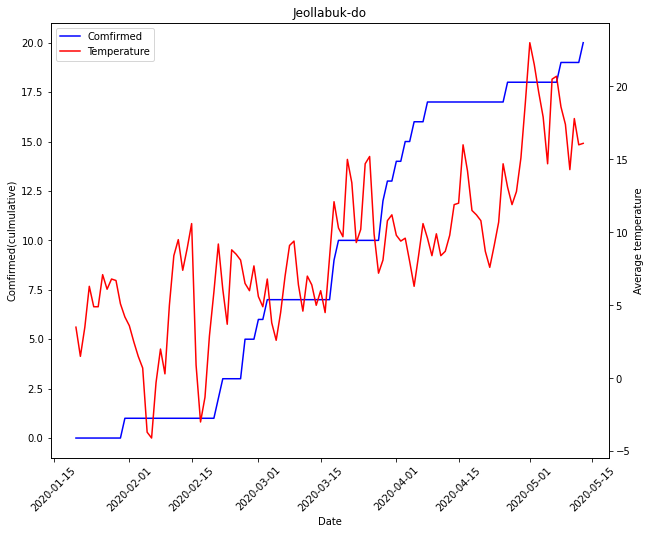

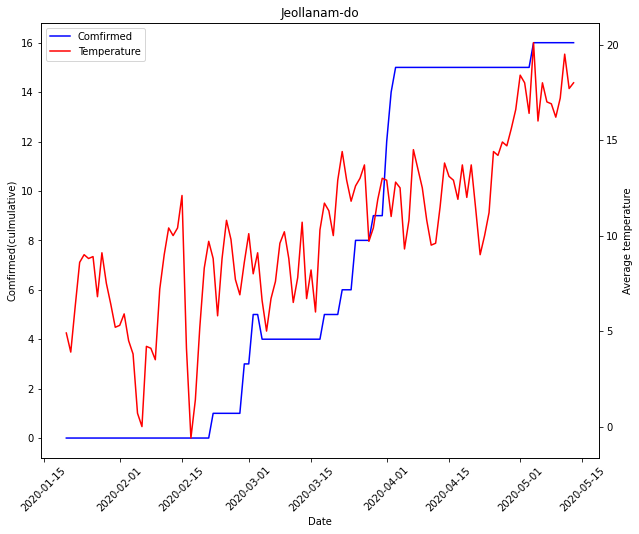

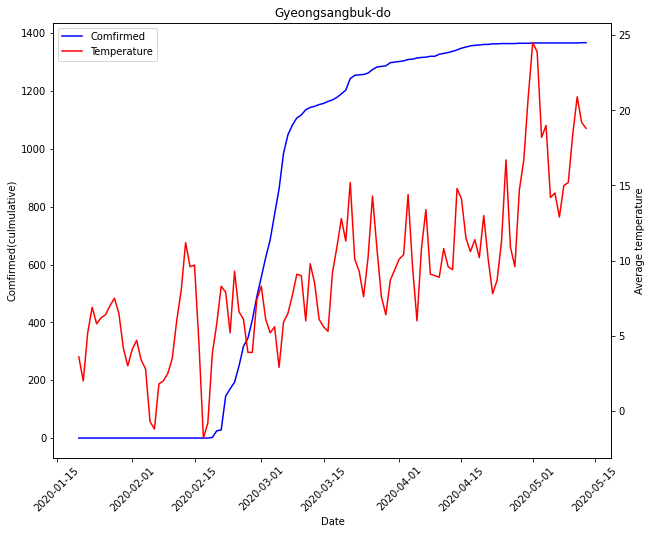

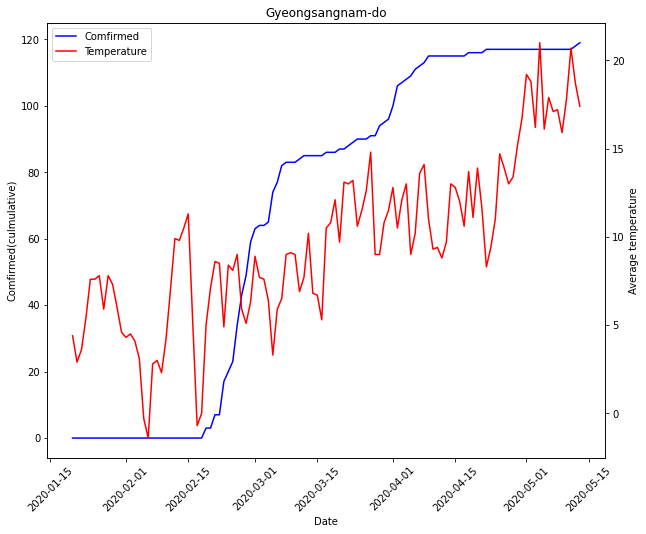

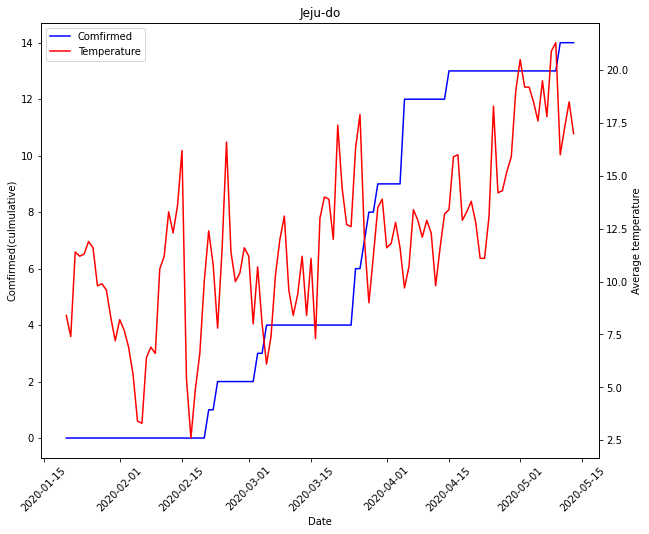

In [12]:
# 累計確診數
for i in range(0,len(location)):
    plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    plt.xticks(rotation=45)
    lns1 = ax1.plot(sick[i].date, sick[i].confirmed,color='blue',label='Comfirmed')
    ax2 = ax1.twinx()
    lns2 = ax2.plot(weather[i].date, weather[i].avg_temp, color='red', label='Temperature')
    ax1.set_title(location[i])
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Comfirmed(culmulative)')
    ax2.set_ylabel('Average temperature')
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    plt.legend(lns,labs,loc=0)
    fig = plt.gcf()
    plt.show()
    fig.savefig('./figure/temperature/culmulative/'+location[i]+'.png')

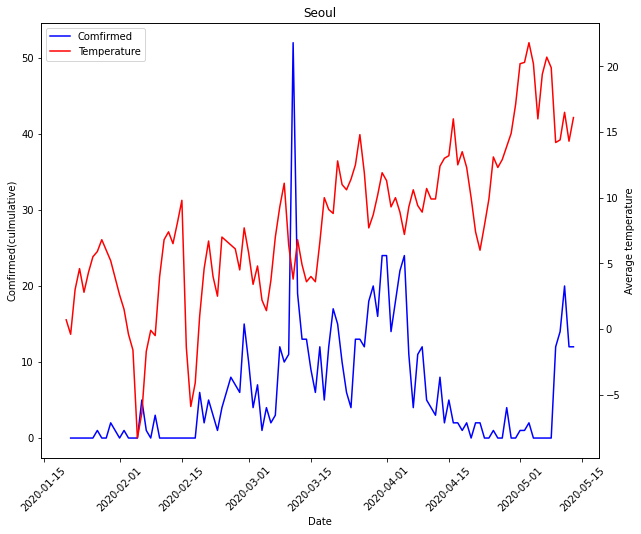

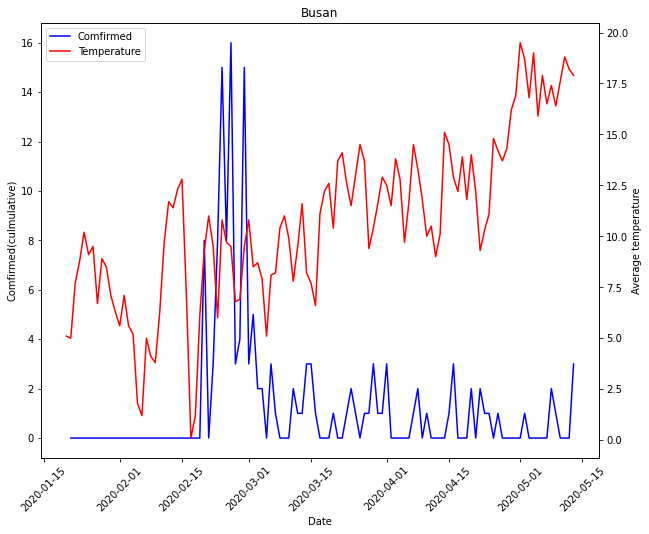

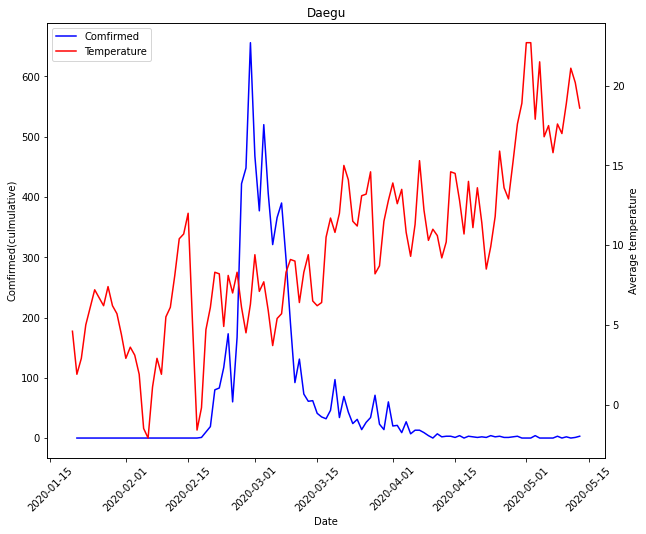

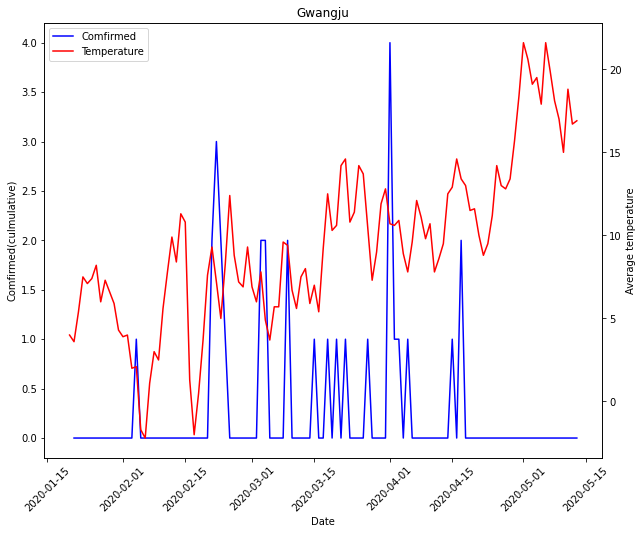

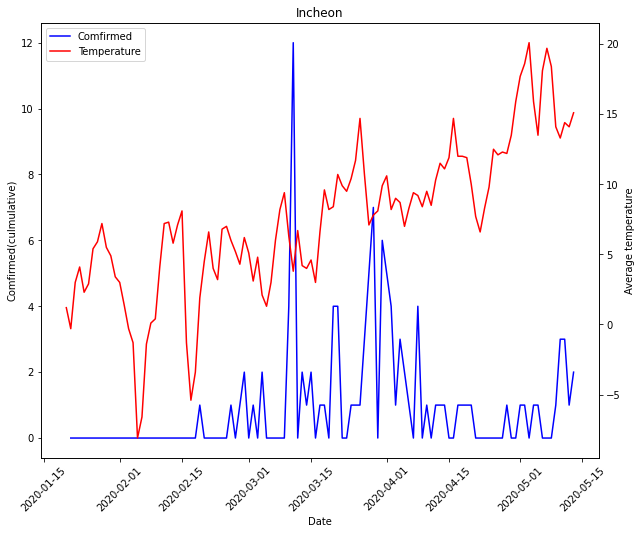

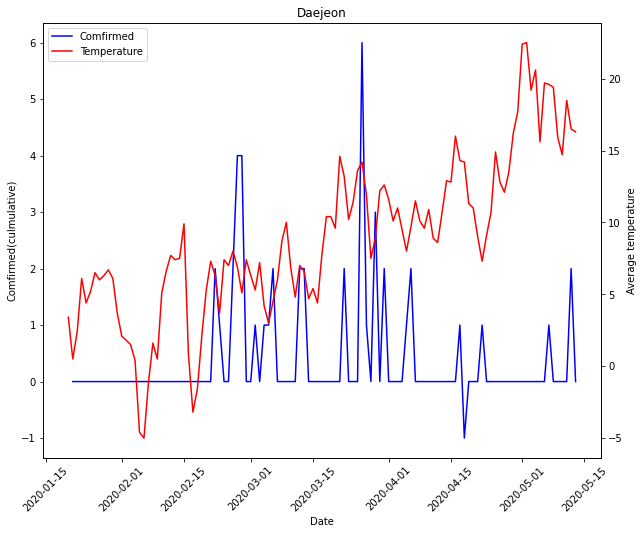

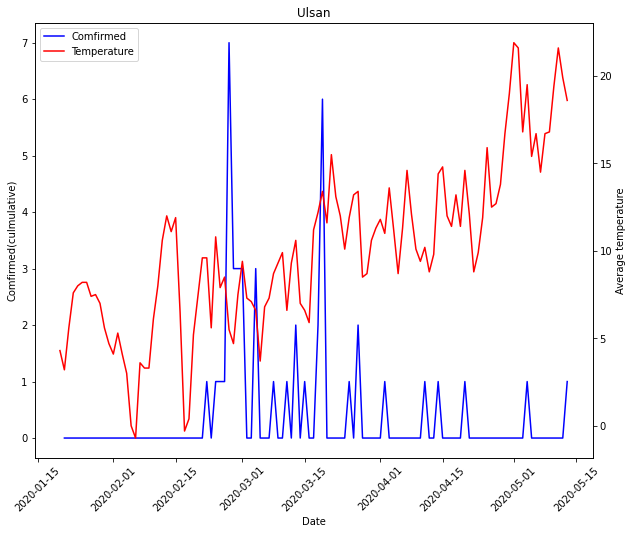

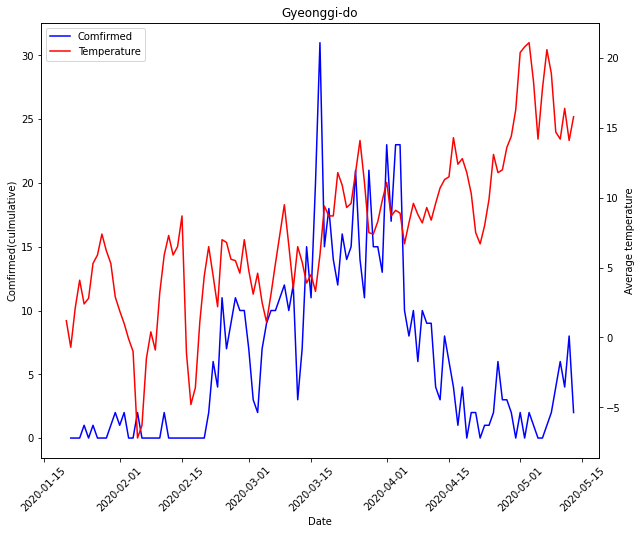

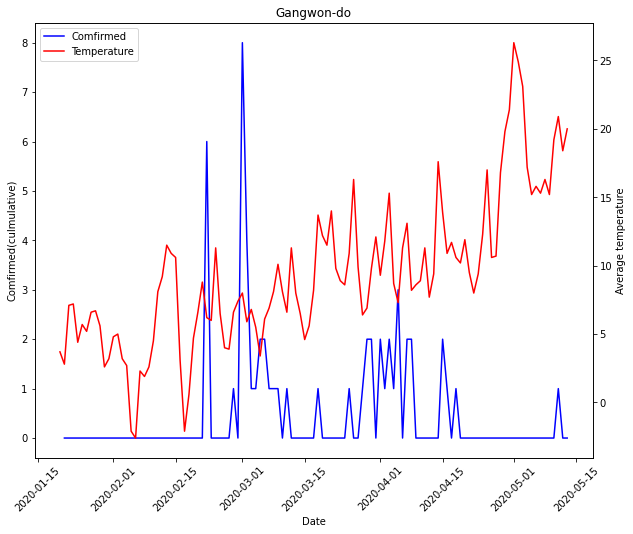

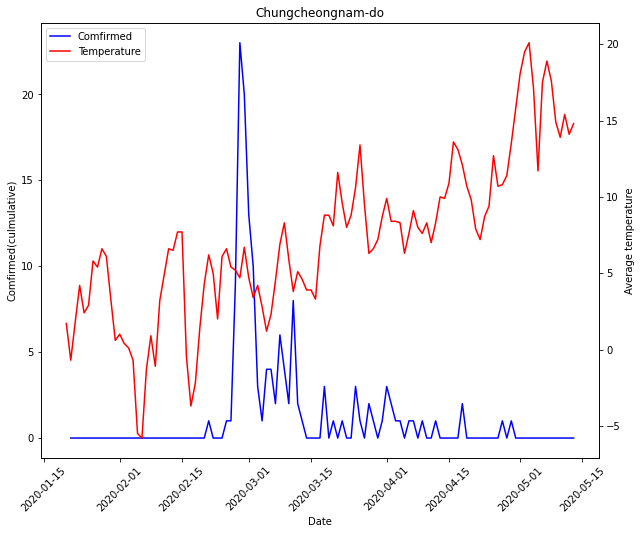

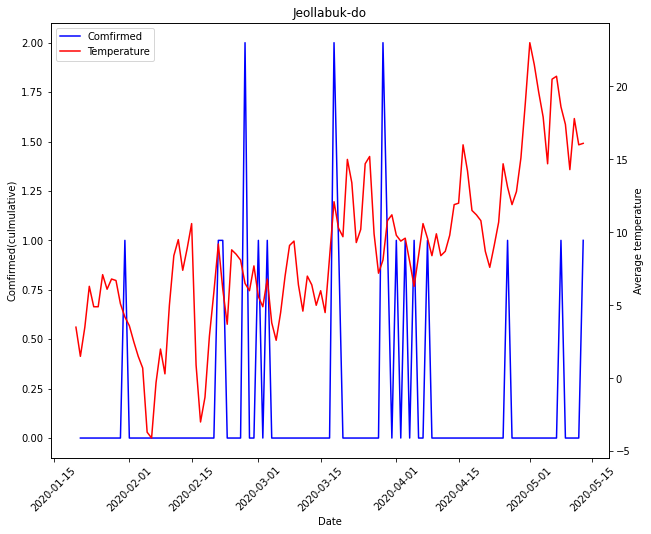

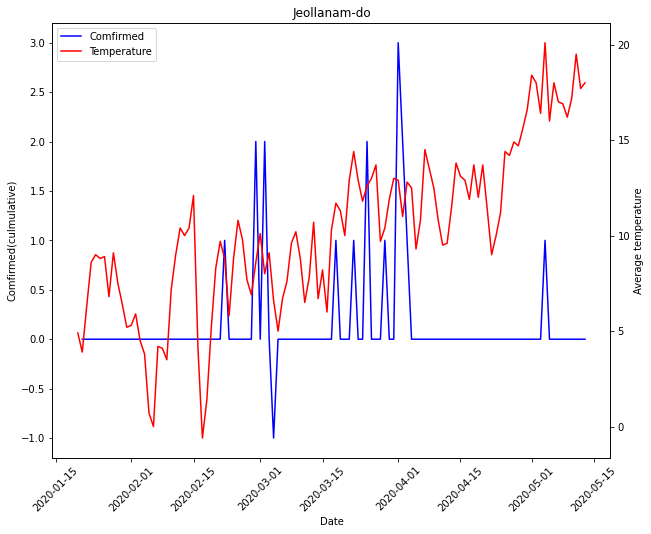

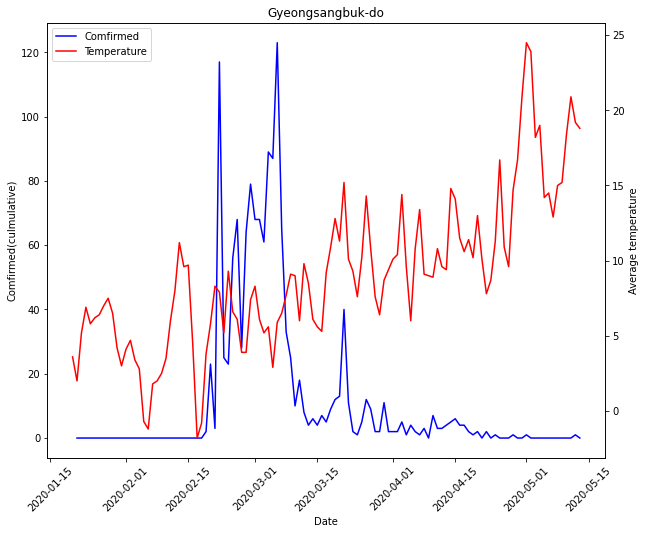

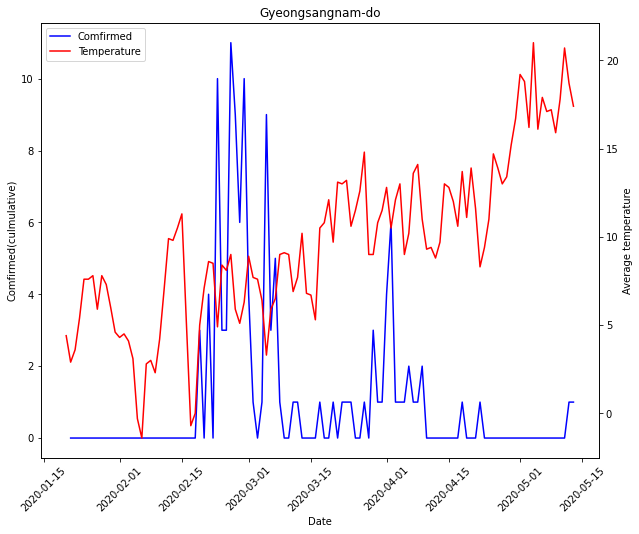

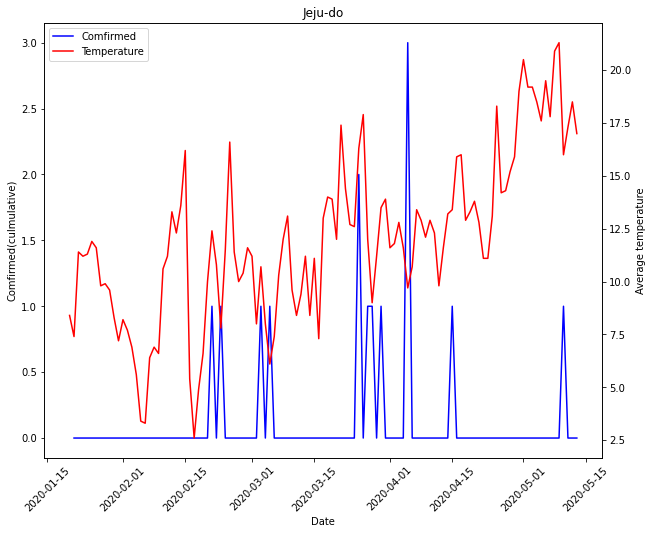

In [13]:
# 當日確診數

for i in range(0,len(location)):
    temp=sick[i].confirmed.shift(1)
    plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    plt.xticks(rotation=45)
    lns1 = ax1.plot(sick[i].date, sick[i].confirmed-temp,color='blue',label='Comfirmed')
    ax2 = ax1.twinx()
    lns2 = ax2.plot(weather[i].date, weather[i].avg_temp, color='red', label='Temperature')
    ax1.set_title(location[i])
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Comfirmed(culmulative)')
    ax2.set_ylabel('Average temperature')
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    plt.legend(lns,labs,loc=0)
    fig = plt.gcf()
    plt.show()
    fig.savefig('./figure/temperature/confirmed/'+location[i]+'.png')

# 溼度與確診數的關係
* 15 個地區 & 全國
* 累計確診數 & 當日確診數

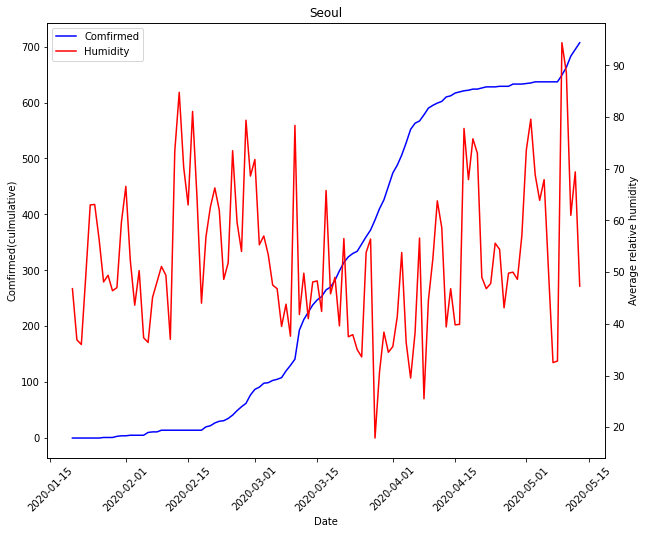

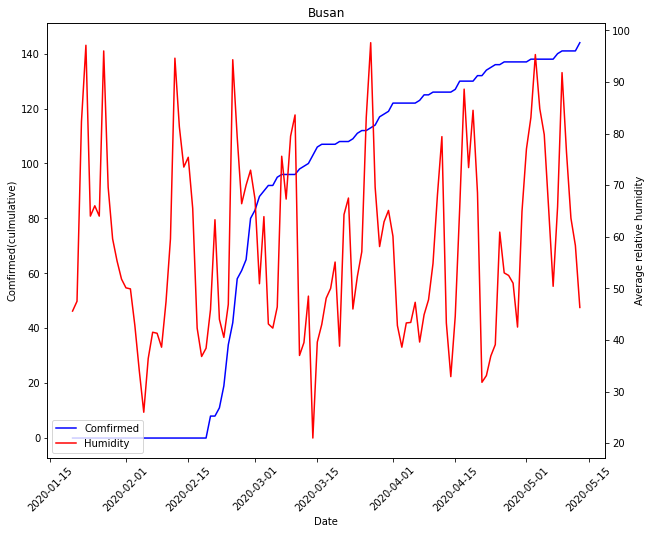

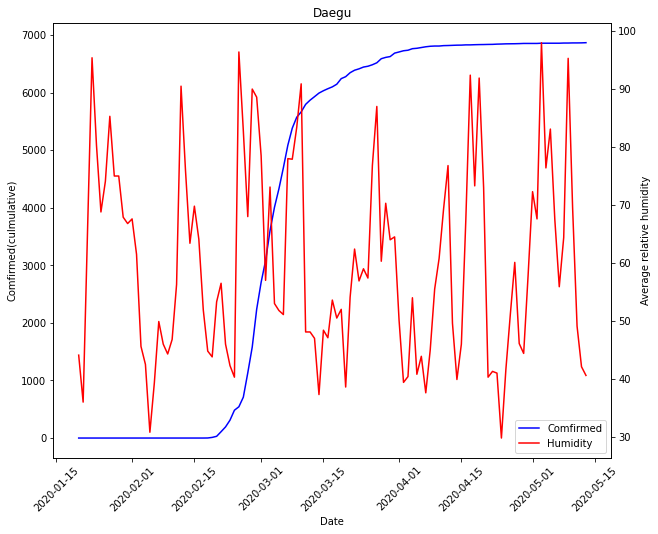

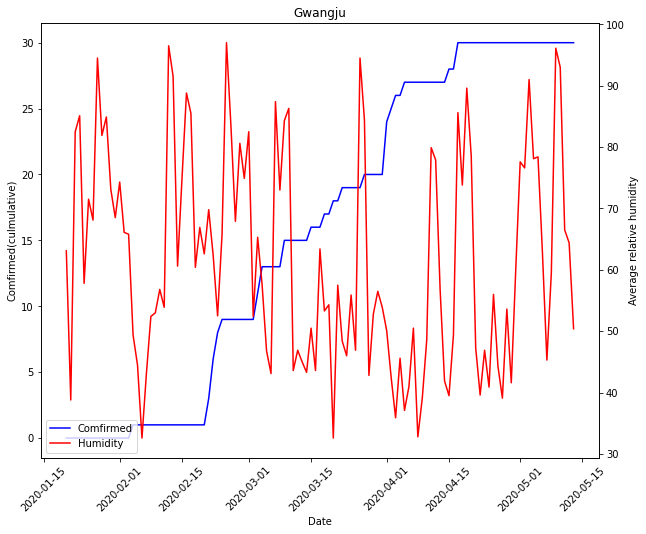

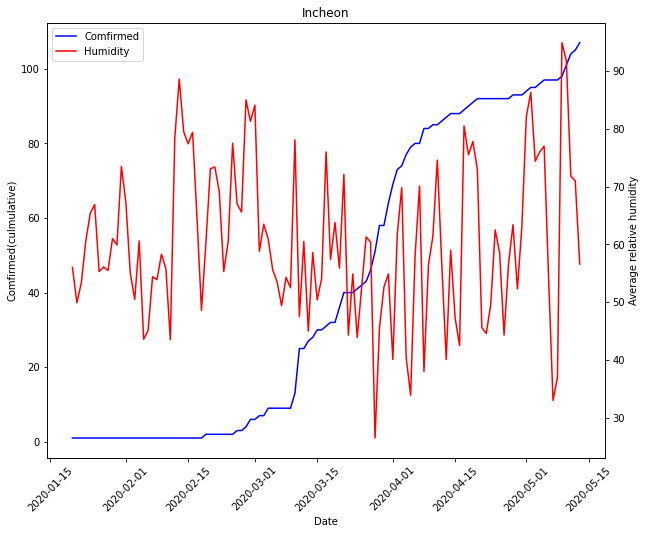

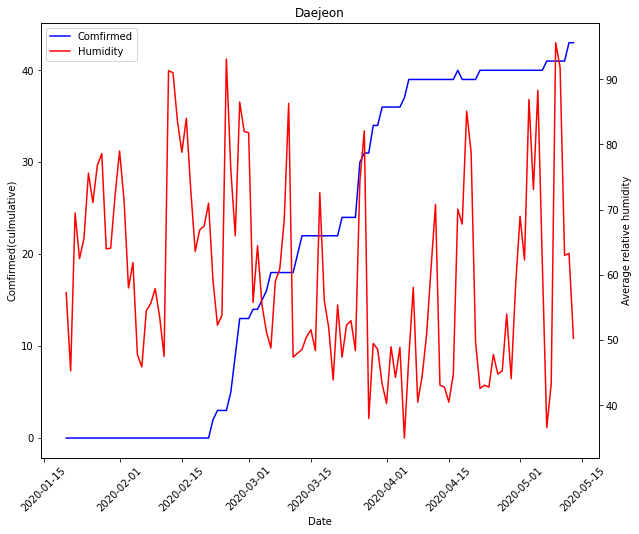

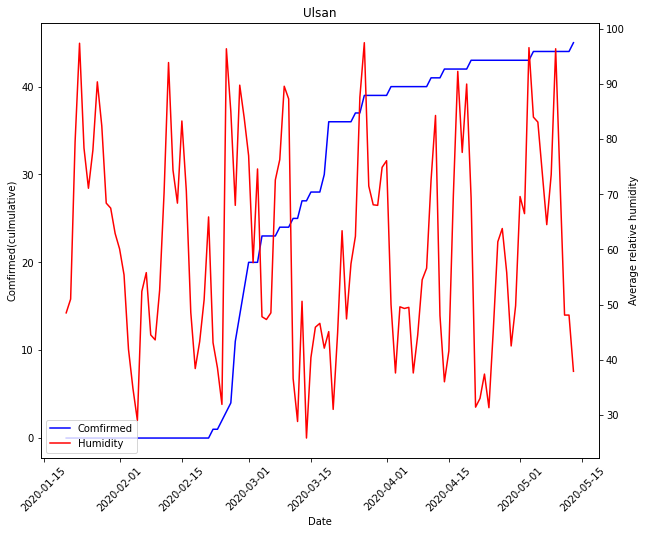

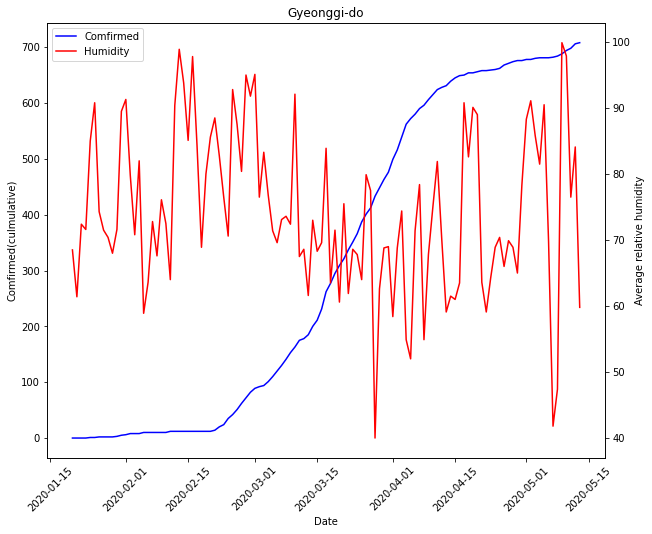

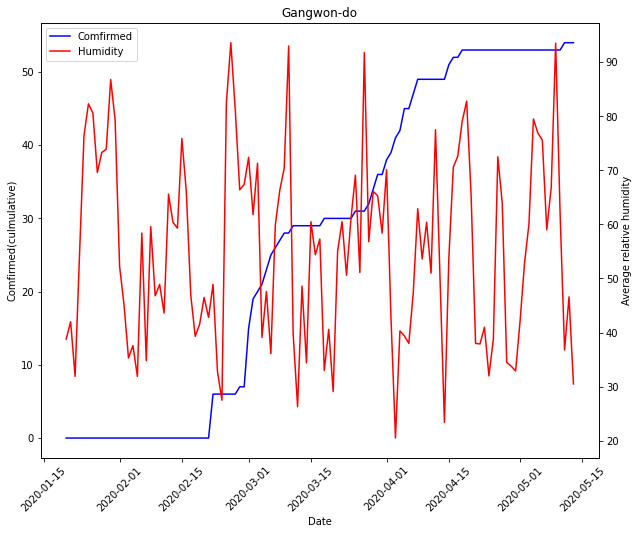

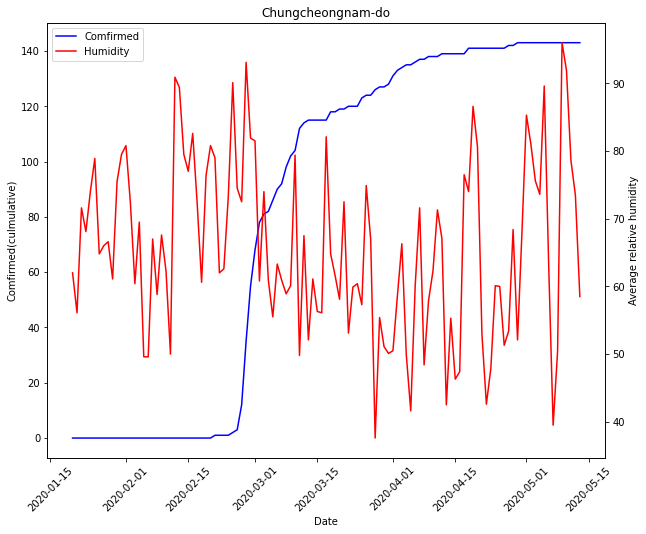

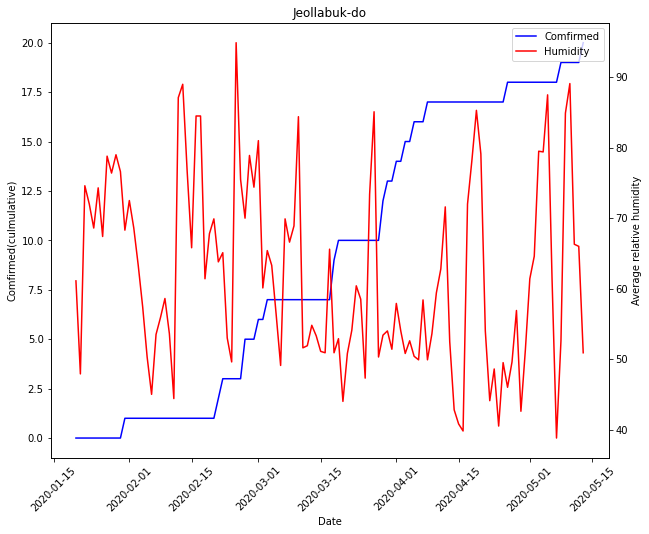

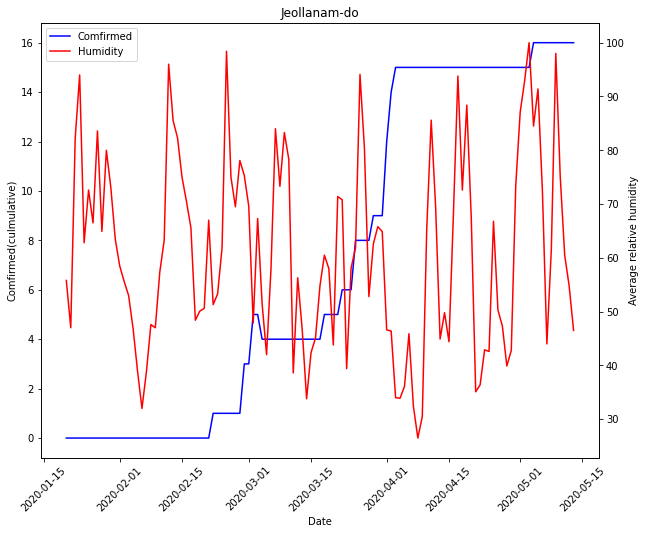

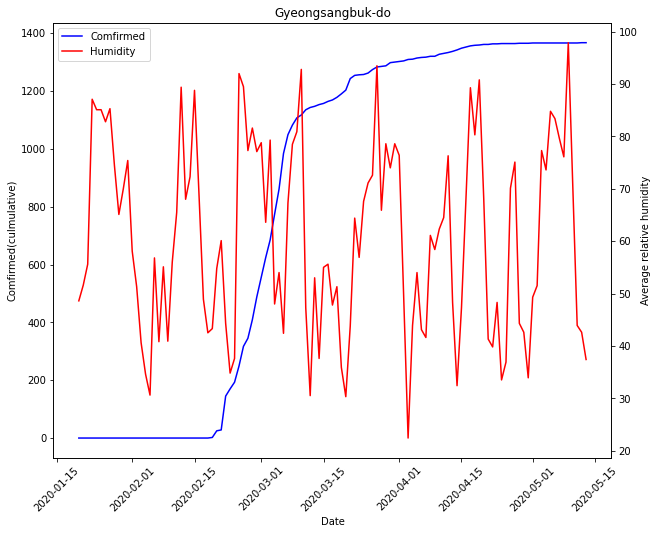

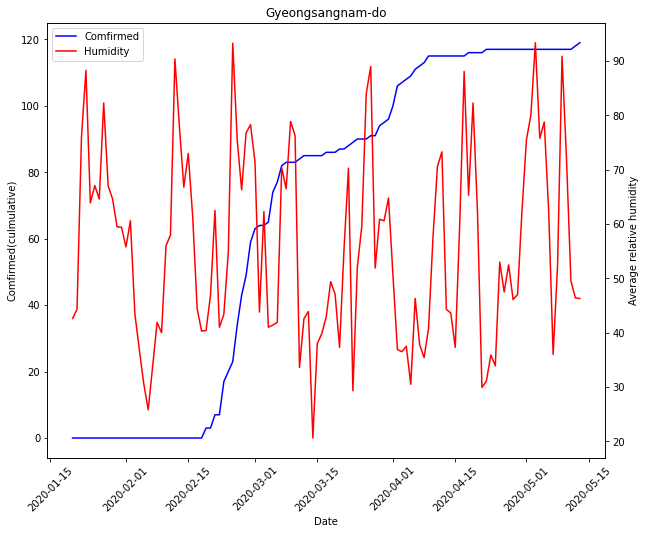

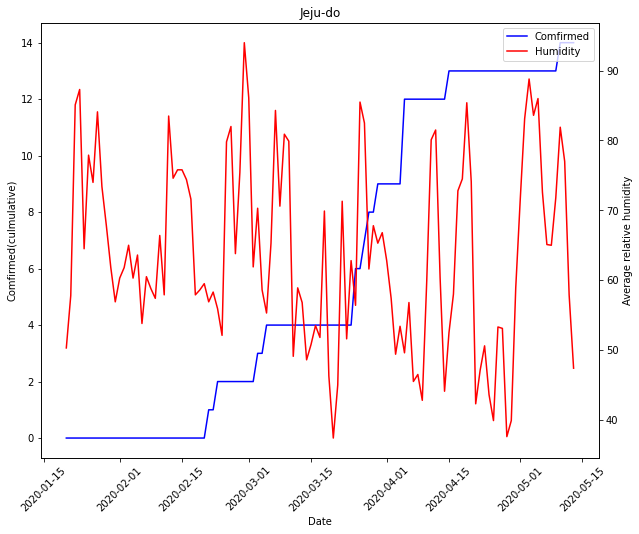

In [14]:
# 累計確診數
for i in range(0,len(location)):
    plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    plt.xticks(rotation=45)
    lns1 = ax1.plot(sick[i].date, sick[i].confirmed,color='blue',label='Comfirmed')
    ax2 = ax1.twinx()
    lns2 = ax2.plot(weather[i].date, weather[i].avg_relative_humidity, color='red', label='Humidity')
    ax1.set_title(location[i])
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Comfirmed(culmulative)')
    ax2.set_ylabel('Average relative humidity')
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    plt.legend(lns,labs,loc=0)
    fig = plt.gcf()
    plt.show()
    fig.savefig('./figure/humidity/culmulative/'+location[i]+'.png')

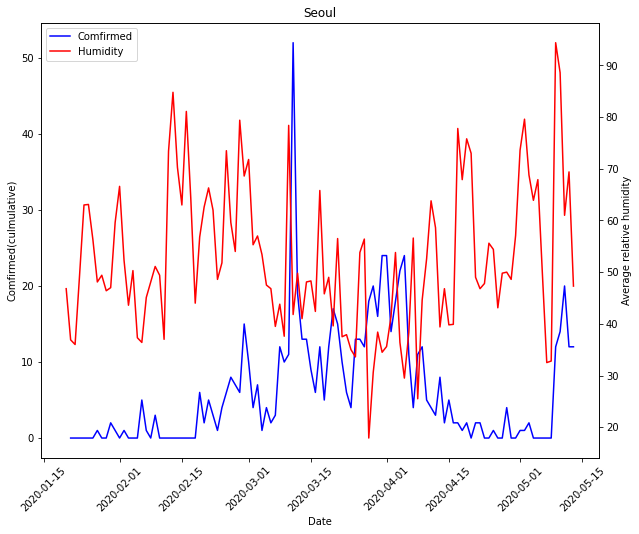

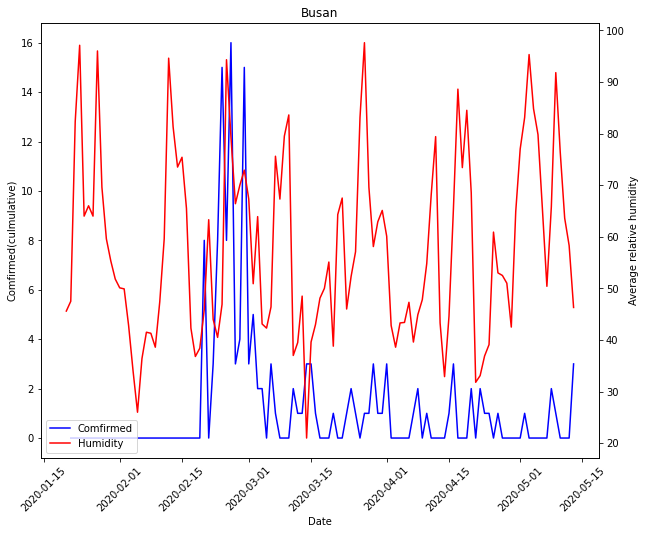

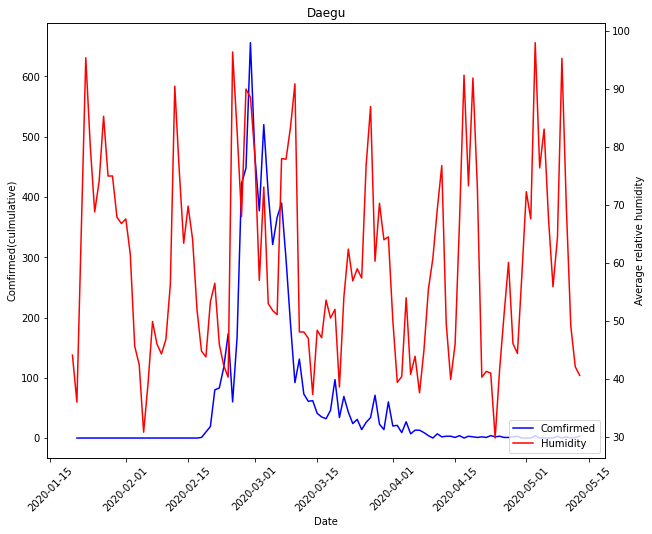

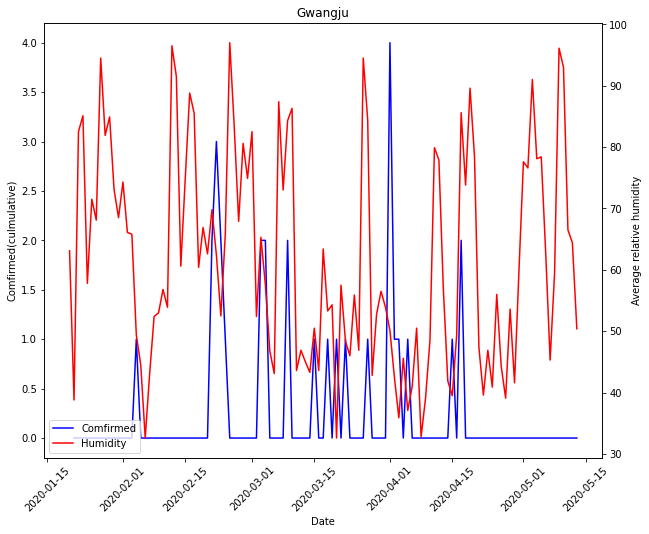

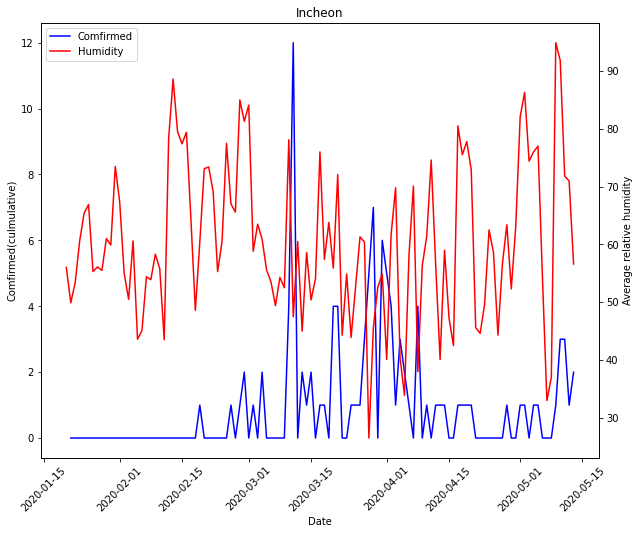

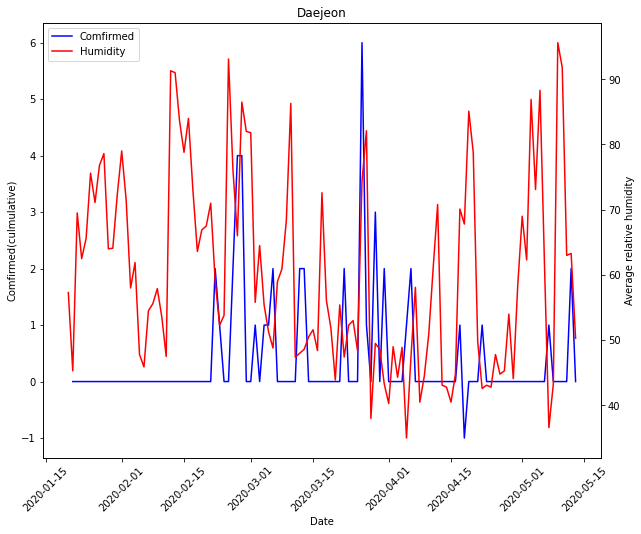

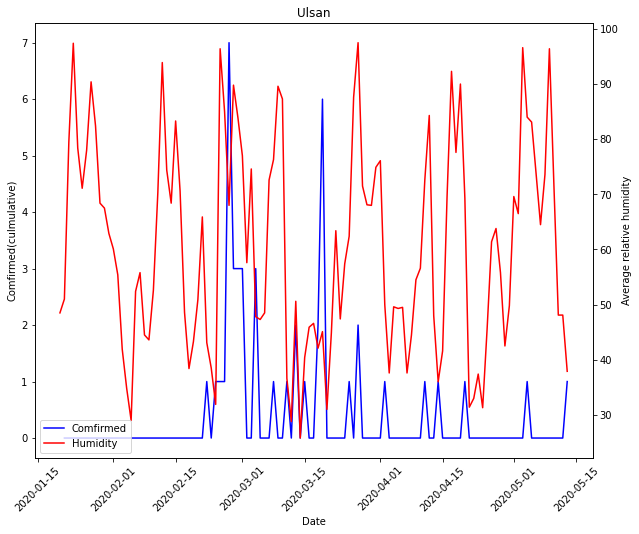

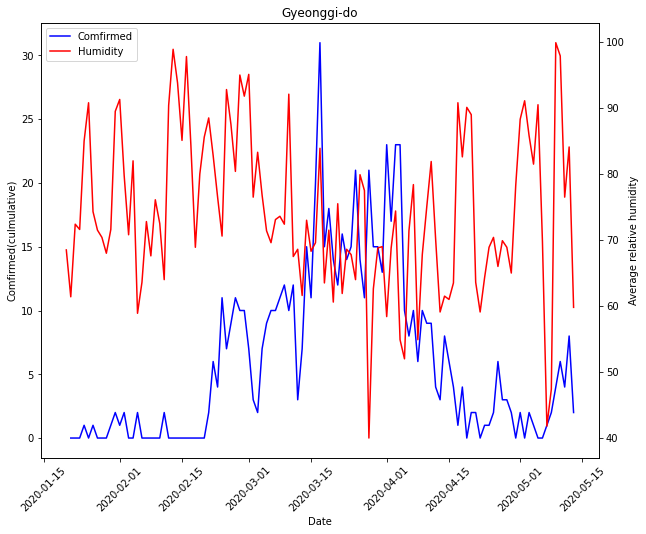

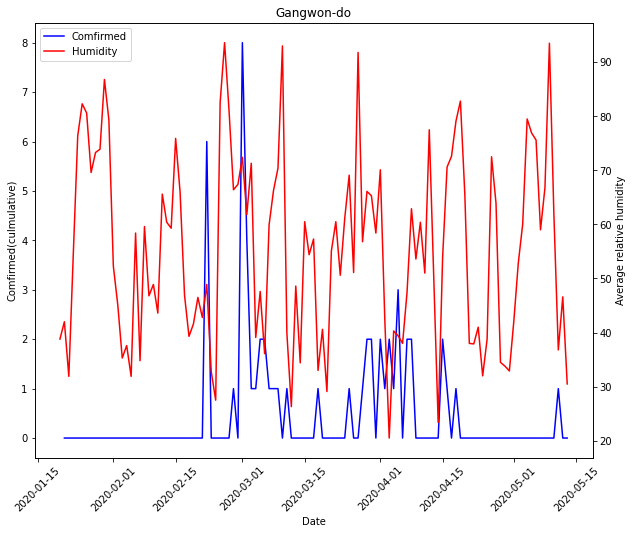

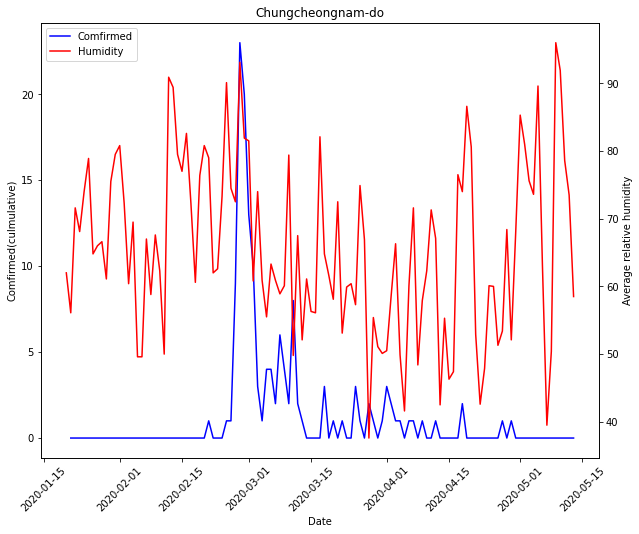

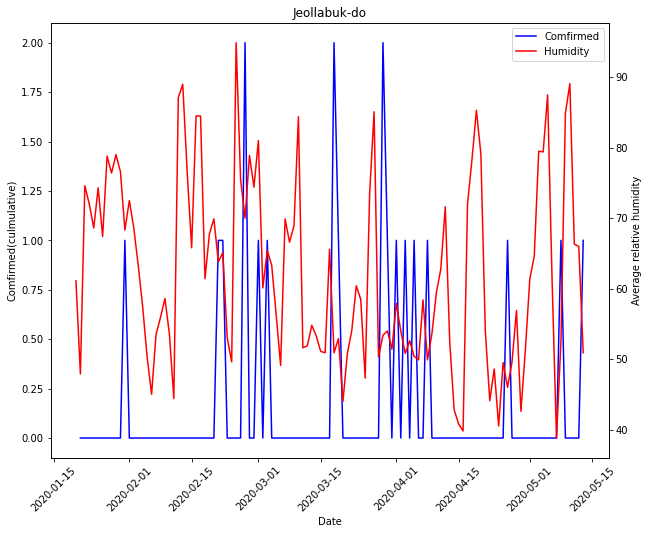

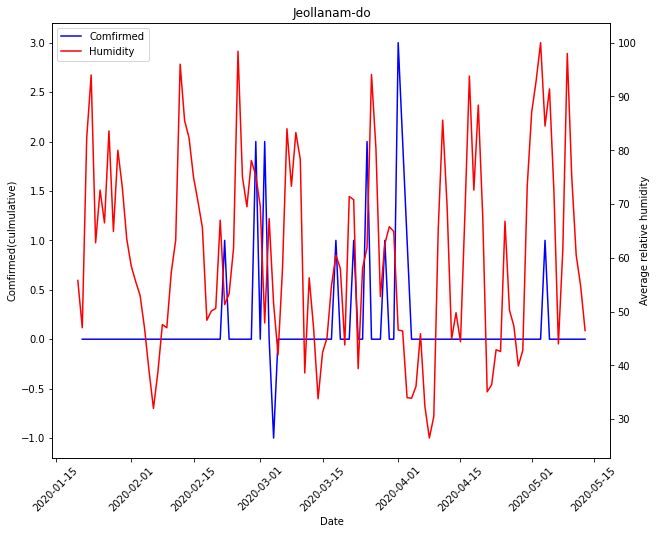

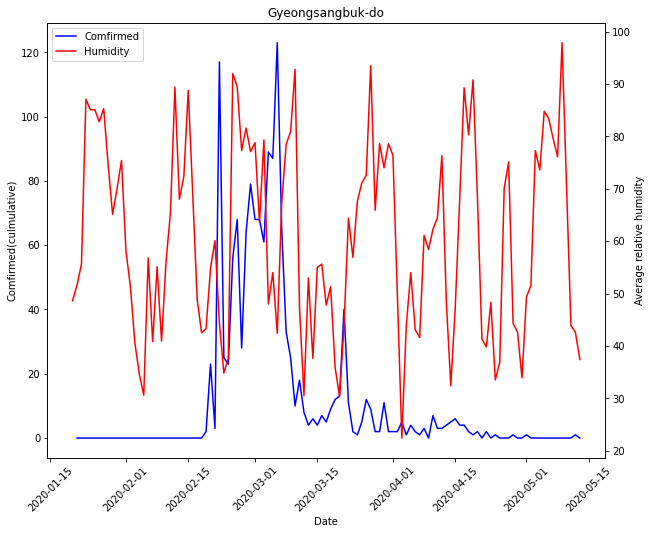

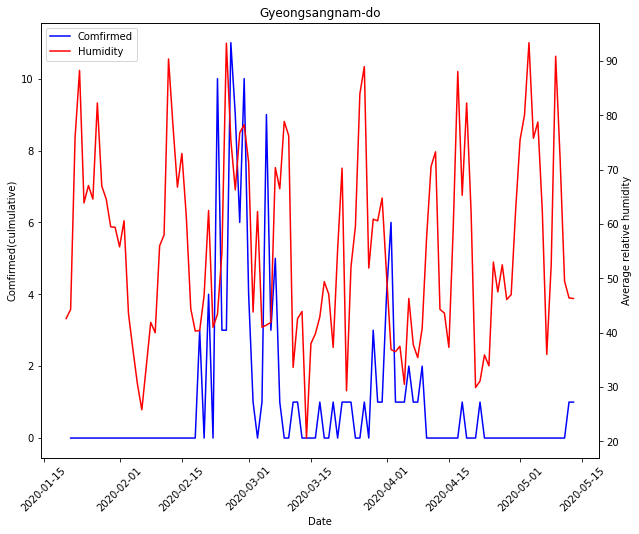

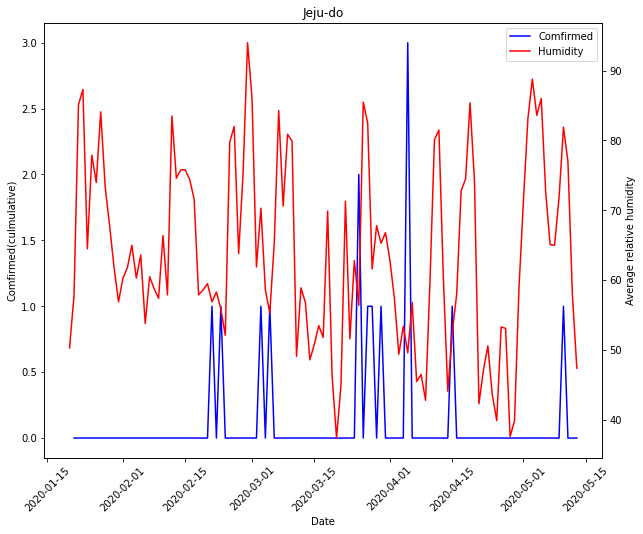

In [15]:
# 當日確診數

for i in range(0,len(location)):
    temp=sick[i].confirmed.shift(1)
    plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    plt.xticks(rotation=45)
    lns1 = ax1.plot(sick[i].date, sick[i].confirmed-temp,color='blue',label='Comfirmed')
    ax2 = ax1.twinx()
    lns2 = ax2.plot(weather[i].date, weather[i].avg_relative_humidity, color='red', label='Humidity')
    ax1.set_title(location[i])
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Comfirmed(culmulative)')
    ax2.set_ylabel('Average relative humidity')
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    plt.legend(lns,labs,loc=0)
    fig = plt.gcf()
    plt.show()
    fig.savefig('./figure/humidity/confirmed/'+location[i]+'.png')

# 全國

In [12]:
# 全國
for i in range(0,len(location)):
    weather[i].set_index('date',inplace=True)
    sick[i].set_index('date',inplace=True)

In [13]:
korea = pd.DataFrame(index=sick[0].index,columns=['confirmed','avg_temp','avg_relative_humidity'])
korea.confirmed = sick[0].confirmed
korea.avg_temp = weather[0].avg_temp
korea.avg_relative_humidity = weather[0].avg_relative_humidity
for i in range(1,len(location)):
    korea.confirmed += sick[i].confirmed
    korea.avg_temp += weather[i].avg_temp
    korea.avg_relative_humidity += weather[i].avg_relative_humidity
korea.avg_temp /= len(location)
korea.avg_relative_humidity /= len(location)
korea

confirmed   avg_temp  avg_relative_humidity
date                                                   
2020-01-20          1   3.646667              52.606667
2020-01-21          1   2.173333              47.566667
2020-01-22          1   4.733333              67.906667
2020-01-23          1   6.506667              78.020000
2020-01-24          2   5.913333              70.320000
...               ...        ...                    ...
2020-05-09      10277  16.146667              93.160000
2020-05-10      10303  16.286667              81.580000
2020-05-11      10331  18.573333              60.813333
2020-05-12      10357  17.106667              59.233333
2020-05-13      10382  17.160000              47.113333

[115 rows x 3 columns]

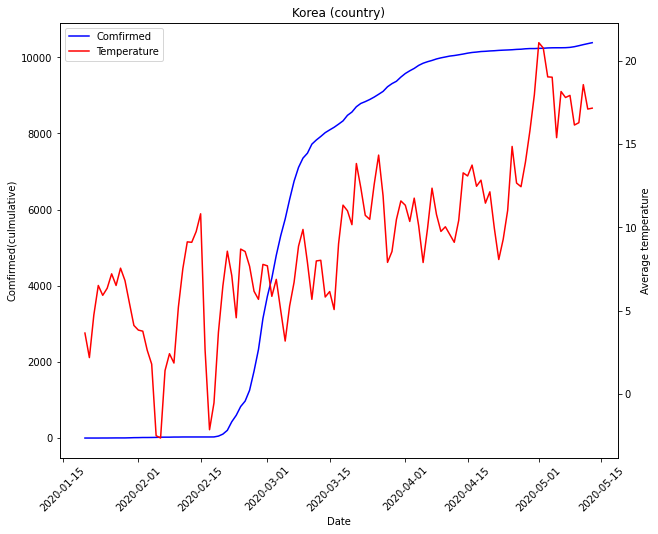

In [14]:
# 溫度:累計
plt.figure(figsize=(10,8))
ax1 = plt.gca()
plt.xticks(rotation=45)
lns1 = ax1.plot(korea.index, korea['confirmed'],color='blue',label='Comfirmed')
ax2 = ax1.twinx()
lns2 = ax2.plot(korea.index, korea['avg_temp'], color='red', label='Temperature')
ax1.set_title('Korea (country)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Comfirmed(culmulative)')
ax2.set_ylabel('Average temperature')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
plt.legend(lns,labs,loc=0)
fig = plt.gcf()
plt.show()
fig.savefig('./figure/temperature/culmulative/Korea.png')

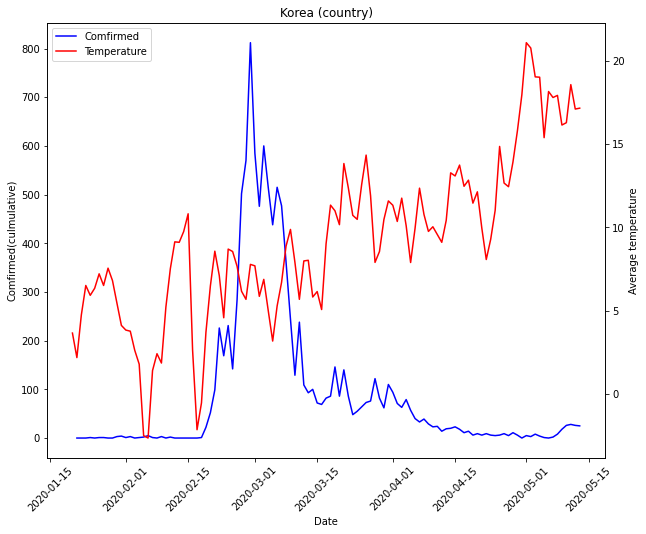

In [15]:
# 溫度:每日
temp=korea.confirmed.shift(1)
plt.figure(figsize=(10,8))
ax1 = plt.gca()
plt.xticks(rotation=45)
lns1 = ax1.plot(korea.index, korea.confirmed-temp,color='blue',label='Comfirmed')
ax2 = ax1.twinx()
lns2 = ax2.plot(korea.index, korea.avg_temp, color='red', label='Temperature')
ax1.set_title('Korea (country)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Comfirmed(culmulative)')
ax2.set_ylabel('Average temperature')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
plt.legend(lns,labs,loc=0)
fig = plt.gcf()
plt.show()
fig.savefig('./figure/temperature/confirmed/Korea.png')

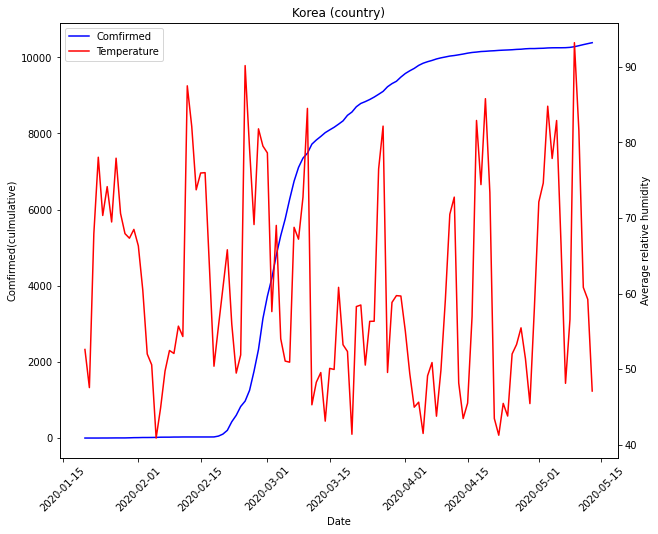

In [16]:
# 溼度:累計
plt.figure(figsize=(10,8))
ax1 = plt.gca()
plt.xticks(rotation=45)
lns1 = ax1.plot(korea.index, korea['confirmed'],color='blue',label='Comfirmed')
ax2 = ax1.twinx()
lns2 = ax2.plot(korea.index, korea['avg_relative_humidity'], color='red', label='Temperature')
ax1.set_title('Korea (country)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Comfirmed(culmulative)')
ax2.set_ylabel('Average relative humidity')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
plt.legend(lns,labs,loc=0)
fig = plt.gcf()
plt.show()
fig.savefig('./figure/humidity/culmulative/Korea.png')

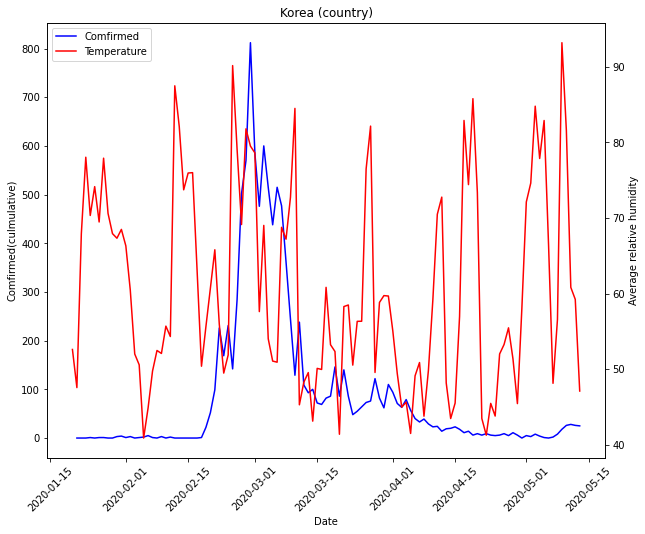

In [17]:
# 溼度:每日
temp=korea.confirmed.shift(1)
plt.figure(figsize=(10,8))
ax1 = plt.gca()
plt.xticks(rotation=45)
lns1 = ax1.plot(korea.index, korea.confirmed-temp,color='blue',label='Comfirmed')
ax2 = ax1.twinx()
lns2 = ax2.plot(korea.index, korea.avg_relative_humidity, color='red', label='Temperature')
ax1.set_title('Korea (country)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Comfirmed(culmulative)')
ax2.set_ylabel('Average relative humidity')
lns = lns1+lns2
labs = [l.get_label() for l in lns]
plt.legend(lns,labs,loc=0)
fig = plt.gcf()
plt.show()
fig.savefig('./figure/humidity/confirmed/Korea.png')